In this notebook, we generate scattering matrix for single layer and twisted bilayer photonic crystals (TBPhC) in the extended bases, so that we can examine in details and understand what happened.

The PhCs will all have same geometric parameters: circular through holes in dielectric slab, arranged in sqare lattice.

Everything is in normalized units: length in units of a (period), frequency in c/a.

In [1]:
from rcwa4d import *
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

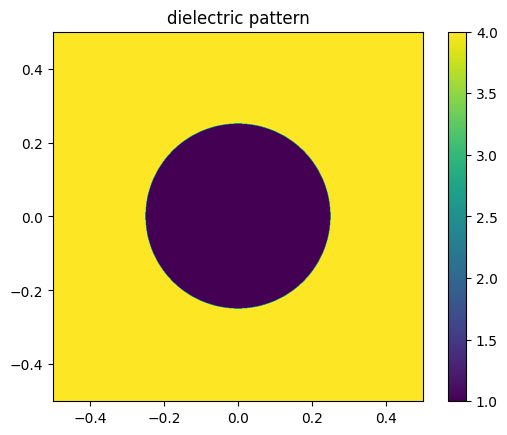

In [2]:
### some params
DEG = np.pi/180
Ny=Nx=1000 ### resolution for dielectric pattern
eps = np.ones([Ny,Nx])*4 ### uniform dielectric slab
radius = 0.25
thickness = 0.2
xs,ys = np.linspace(-0.5,0.5,Nx), np.linspace(-0.5,0.5,Ny)
xs,ys = np.meshgrid(xs,ys)
eps[xs**2 + ys**2 < radius**2] = 1 ### air holes in dielectric slab
plt.imshow(eps,extent=[-0.5,0.5,-0.5,0.5]); plt.colorbar(); plt.title('dielectric pattern'); plt.show()
### size of truncation of reciprocal lattice:
ind = 1
NM = (2*ind+1)**2
NMNM = NM**2
### frequencies to scan through:
freqs = np.linspace(0.7,0.84,141)
twists = np.linspace(0,45,46) * DEG

### single layer

In [23]:
obj1 = rcwa([eps], [thickness], None, N=ind, M=ind, verbose=0)
obj1.set_freq_k(freqs[0], (0, 0))
(r,t), (reflected,transmitted) = obj1.get_RT(0,1, storing_intermediate_Smats=True)

In [24]:
print('total reflection and transmittion:\n',r,t)
print('each polarization component of 0th-order reflection and transmittion:\n',reflected,transmitted)

total reflection and transmittion:
 0.36071567661713666 0.6392843233828623
each polarization component of 0th-order reflection and transmittion:
 [-5.96651549e-01+6.8721221e-02j -3.54746684e-16-3.0091738e-16j
  0.00000000e+00+0.0000000e+00j] [-9.14861572e-02-7.94301332e-01j  4.10678874e-16+1.08838402e-16j
  0.00000000e+00+0.00000000e+00j]


In [25]:
with open('example-scat-mat-1layer.pkl', 'wb') as f:
    # pickle.dump(obj1.internal_Smats, f)
    pickle.dump(obj1.Sg, f)
# with open('example-scat-mat-1layer.pkl', 'rb') as f:
#     tmp = pickle.load(f)

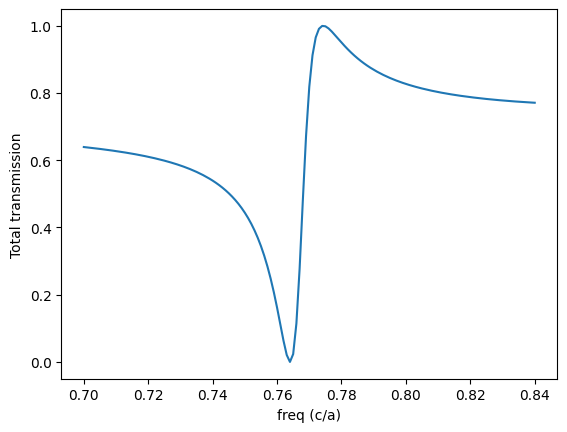

In [6]:
trans = []
for freq in freqs:
    obj1.set_freq_k(freq, (0, 0))
    (r,t), (reflected,transmitted) = obj1.get_RT(0,1)
    trans.append(t)
plt.plot(freqs,trans); plt.xlabel('freq (c/a)'); plt.ylabel('Total transmission'); plt.show()

## Twisted bilayer

In [26]:
obj2 = rcwa([eps,eps], [thickness,thickness], [1,2],twist=1e-4, N=ind, M=ind, verbose=0)
obj2.set_freq_k(freqs[0], (0, 0))
(r,t), (reflected,transmitted) = obj2.get_RT(0,1, storing_intermediate_Smats=True)

In [27]:
print('total reflection and transmittion:\n',r,t)
print('each polarization component of 0th-order reflection and transmittion:\n',reflected,transmitted)

total reflection and transmittion:
 0.022103168621005725 0.9778968313789919
each polarization component of 0th-order reflection and transmittion:
 [-1.48760253e-02-5.40750257e-02j -1.57761435e-16-1.42820744e-17j
  0.00000000e+00+0.00000000e+00j] [-9.83280507e-01+5.59317347e-02j -2.94936647e-06-2.76800419e-06j
  0.00000000e+00+0.00000000e+00j]


In [28]:
with open('example-scat-mat-2layers.pkl', 'wb') as f:
    # pickle.dump(obj2.internal_Smats, f)
    pickle.dump([obj2.internal_Smats[1],obj2.Sg], f)
# with open('example-scat-mat-2layer.pkl', 'rb') as f:
#     tmp = pickle.load(f)